## This Notebook - Goals - FOR EDINA

**What?:**
- Standard classification method example/tutorial

**Who?:**
- Researchers in ML
- Students in computer science
- Teachers in ML/STEM

**Why?:**
- Demonstrate capability/simplicity of core scipy stack. 
- Demonstrate common ML concept known to learners and used by researchers.

**Noteable features to exploit:**
- use of pre-installed libraries

**How?:**
- clear to understand - minimise assumed knowledge
- clear visualisations - concise explanations
- recognisable/familiar - use standard methods
- Effective use of core libraries

<hr>

# Classification - K nearest neighbours

K-nearest neighbours classification is a supervised learning method, meaning that data used contains information on some feature that the model should predict.

K nearest neighbours is a simple and effective way to deal with classification problems. This method classifies each sample based on the class of the points that are closest to it.

This notebook shows the process of classifying handwritten digits. 

Sources: [Iris example](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

On Noteable, all the libaries required for this notebook are pre-installed, so they simply need to be imported:

In [1]:
import numpy as np  # provides useful array methods
import sklearn # scipy machine learning library
import sklearn.datasets as ds # sklearn has datasets we can use
import sklearn.model_selection as ms 
from sklearn.decomposition import PCA # used for visualisation
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#import math

# matplotlib has a magic command - interactive in notebook
import matplotlib.pyplot as plt
%matplotlib inline

In terms of data, sklearn comes with data that can be used here, it just needs to be loaded.

In [2]:
# get the digits data from scikit
digits = ds.load_digits()

The cell above stores the data as a [Bunch object](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html), meaning that the data (in this case images of handwritten digits) and the target (the number that is written) can be split by accessing the attributes of the Bunch object:

In [3]:
# store data and targets seperately
X = digits.data    # store the images in numpy array X
y = digits.target  # store corresponding targets in numpy array y

print("The data is of the shape", X.shape)
print("The target data is of the shape", y.shape)
print(digits.images.shape)

The data is of the shape (1797, 64)
The target data is of the shape (1797,)
(1797, 8, 8)


The images can be examined by using pyplot's matshow function. The index here is the sample, so to print the 17th sample in the data set:

The image below has a target of 7: 7


<Figure size 432x288 with 0 Axes>

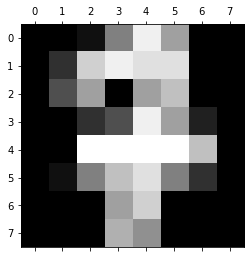

In [4]:
# print images with target val:
plt.gray() # unnecessary
plt.matshow(digits.images[17])
print("The image below has a target of 7:", y[17])

Once the model has been fitted to the data, the model will need to be tested on some data it has not seen before. The next cell is used to shuffle all data, then set some data aside for testing later. 

For this example, 1/4 of the data will be set aside for testing, and the model will be trained on the "training set".

X still corresponds to data samples, and y still corresponds to labels.

In [5]:
# cool sklearn function that will split data to random train and test subset
X_train, X_test, y_train, y_test = \
    ms.train_test_split(X, y, test_size=0.25, shuffle=True)

The data can be examined - here you can see that 1347 samples have been put into the training set, and 450 have been set aside for testing.

In [6]:
# all ndarrays
print(X_train.shape) # (1347, 64) 
print(X_test.shape)  # (450, 64)
print(type(y_train)) # (1347,)
print(type(y_test))  # (450,)

(1347, 64)
(450, 64)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Brief sidestep to PCA to examine data

Before diving in to classifying the data, it is often useful to visualise it.

Each sample in this data set is an image of 8x8 pixels - thats 64 pixels that need to be visualised!

One of the easiest ways of visualising high dimensional data is by principal component analysis (PCA). This maps the 64 dimensional image data onto a lowe dimension map (here we will map to 2D) so it can be easily viewed on a graph.

The next cell describes the particulars of the PCA being done here. In this case, the 2 most important components are maintained, so that the data can be visualised on a 2D graph.

In [7]:
pca = PCA(n_components=2)

The next step is to perform the PCA on the training data, and store in the variable X_pca.

In [8]:
X_pca = pca.fit_transform(X_train)
T_pca = pca.transform(X_test) # for later

In [9]:
#X_pca = pca.transform(X_train)
T_pca.shape # (1347,2)

(450, 2)

Now that there is a 2D representation of the data, it can be plotted on a regular scatter graph. Since the labels corresponding to each point are stored in the y_train variable, the plot can be colour coded by target value!

Different coloured dots have different target values.

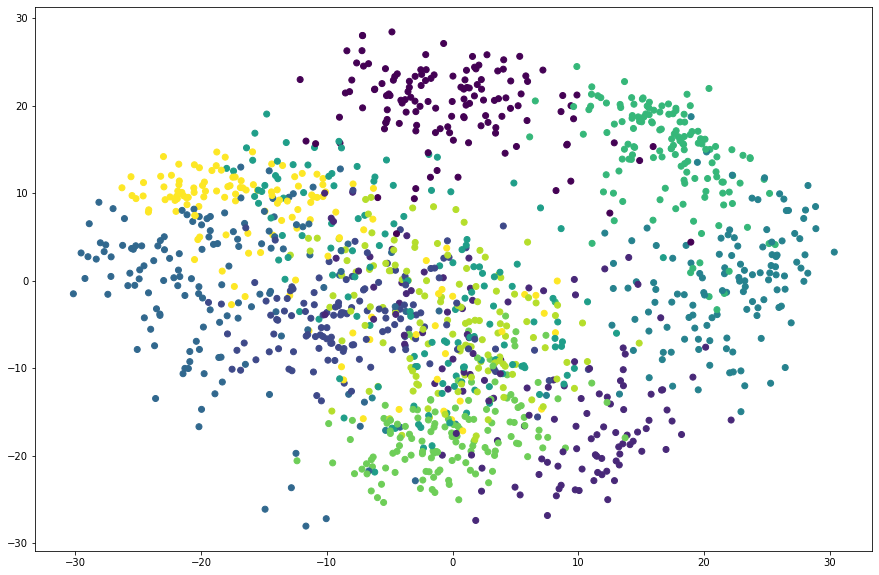

In [10]:
# using matplotlib's colormaps, choose the colours for each digit
cmap_digits = plt.cm.viridis

plt.figure(figsize = (15,10))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap=cmap_digits) # TODO add colour

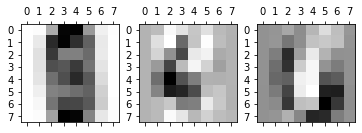

In [11]:
## copied from http://amueller.github.io/sklearn_tutorial/#/12

# average, first component, second component
fix, ax = plt.subplots(1, 3)
ax[0].matshow(pca.mean_.reshape(8, 8), cmap=plt.cm.Greys)
ax[1].matshow(pca.components_[0, :].reshape(8, 8), cmap=plt.cm.Greys)
ax[2].matshow(pca.components_[1, :].reshape(8, 8), cmap=plt.cm.Greys);

## Fitting the KNN model

The sklearn library allows fitting of a KNN model just as with PCA above.

First, create the classifier (specifying any additional parameters, in this case there are none):

In [12]:
knn = KNeighborsClassifier()

The next step fits the KNN model using the training data in 2 dimensions.

In [13]:
# fit in principal components for sake of sanity
knn.fit(X_pca,y_train)

KNeighborsClassifier()

In [14]:
accuracy = round(knn.score(T_pca,y_test)*100, 2)
print("Accuracy of model is: " + str(accuracy) + "%")

Accuracy of model is: 64.0%


In [15]:
# predict test data
preds = knn.predict(T_pca)
#preds.shape

Predicted:

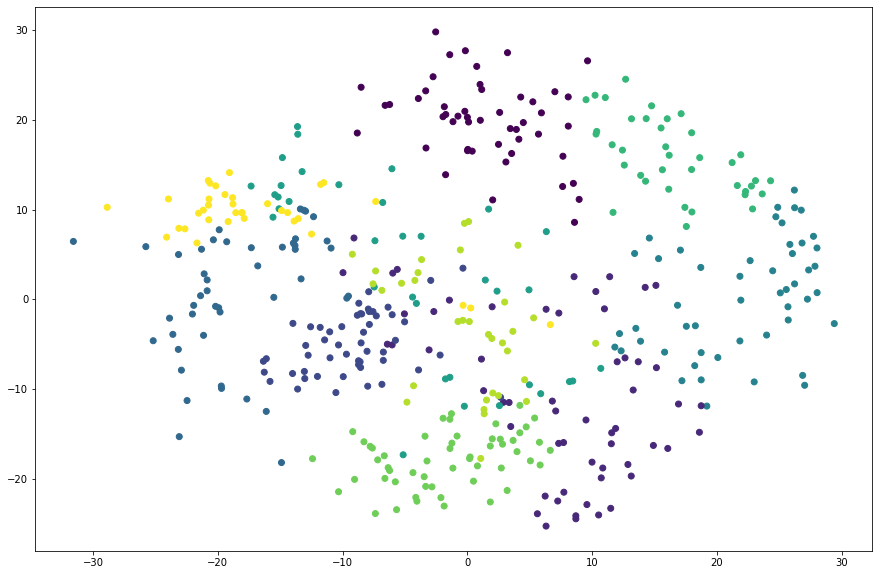

In [16]:
plt.figure(figsize = (15,10))
plt.scatter(T_pca[:,0], T_pca[:,1], c=preds, cmap=cmap_digits) # TODO add colour

Actual:

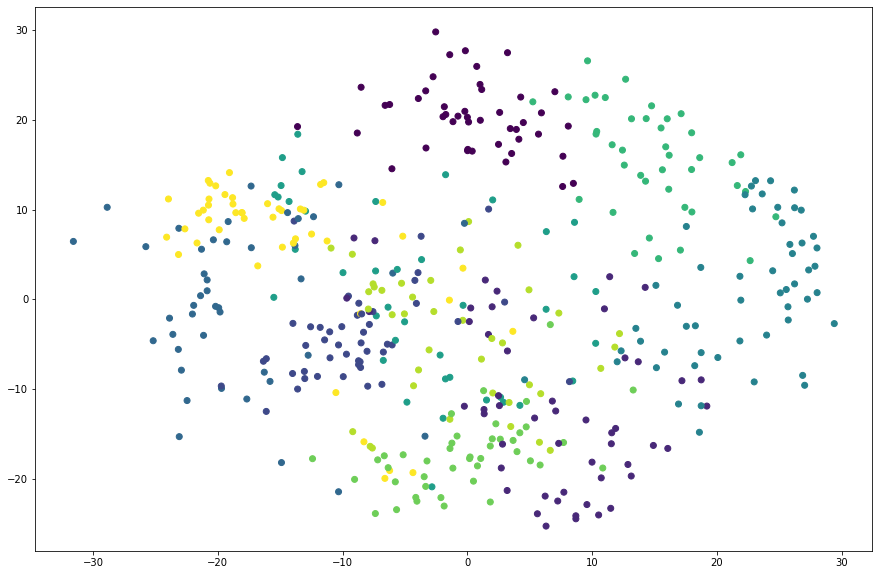

In [17]:
plt.figure(figsize = (15,10))
plt.scatter(T_pca[:,0], T_pca[:,1], c=y_test, cmap=cmap_digits) # TODO add colour

Confusion matrix:

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        45
           1       0.53      0.58      0.55        52
           2       0.63      0.70      0.67        47
           3       0.63      0.67      0.65        43
           4       0.78      0.74      0.76        53
           5       0.31      0.28      0.29        40
           6       0.82      0.76      0.78        41
           7       0.65      0.81      0.72        43
           8       0.36      0.31      0.33        39
           9       0.71      0.53      0.61        47

    accuracy                           0.64       450
   macro avg       0.63      0.63      0.63       450
weighted avg       0.64      0.64      0.63       450



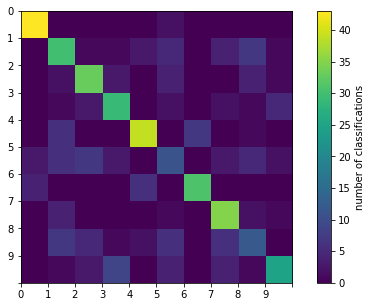

In [18]:
# using seaborn (buggy) / base stack

conf = metrics.confusion_matrix(y_test,preds)

import seaborn
f, ax = plt.subplots(figsize=(9,5))
im = ax.imshow(conf, cmap=cmap_digits)
ax.set_xticks(np.arange(-0.5,10.5))
ax.set_yticks(np.arange(-0.5,10.5))
ax.set_xticklabels(list(range(0,10)))
ax.set_yticklabels(list(range(0,10)))
ax.set_ylim(9.5,-0.5)
#ax.ylabel("true")
plt.colorbar(im).set_label(label="number of classifications")

#seaborn.make_confusion_matrix(conf, cmap="binary")

# buggy -
#seaborn.heatmap(conf, annot=True, fmt="d", linewidths=0.5,ax=ax) 
#seaborn.heatmap(conf, annot=True, fmt="", linewidths=0.5) 
print(metrics.classification_report(y_test, preds))

Due to things being broken, try bokeh which might be nicer anyway:

Shame about the documentation

beautiful but
why

pulled example from: [here](https://docs.bokeh.org/en/latest/docs/gallery/categorical.html )

docs [here](https://docs.bokeh.org/en/latest/docs/reference/plotting.html)

In [19]:
# gear shift, try bokeh instead - since seaborn is buggy
# this is entirely stolen from
# https://docs.bokeh.org/en/latest/docs/gallery/categorical.html

from bokeh.layouts import row
from bokeh.plotting import figure, output_file, show

factors = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
x = factors
y = factors
colors = [
    "#0B486B", "#79BD9A", "#CFF09E",
    "#79BD9A", "#0B486B", "#79BD9A",
    "#CFF09E", "#79BD9A", "#0B486B", "#0B486B" ]

hm = figure(title="Categorical Heatmap", tools="hover", toolbar_location=None,
            x_range=factors, y_range=factors)

hm.rect(x, y, color=colors, width=1, height=1)

output_file("categorical.html", title="categorical.py example")

show(row(hm, sizing_mode="scale_width"))

# TERRIBLY BROKEN WHERE IS THE DOCUMENTATION IT IS A MYSTERY
# actually executing nothing right now

Next steps:
- Plot the points, highlighted red if misclassified. (if pred!= true)
- consider other visualisations for heatmap (bokeh)
- consider error rate examination
- consider ranging k over values and plotting
- optimise code
- try 3 principle components -- 3D vis
- accuracy plot true pos, true neg quadrants?
